# Constructing multi nn to classify positive and negative reviews from imdb dataset

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from keras.datasets import imdb
from keras import models, layers

Using TensorFlow backend.


## 1. Customize np.load and load imdb

In [2]:
np_default_load = np.load
np.load = lambda *arg, **kwarg: np_default_load(*arg, **kwarg, allow_pickle = True)

In [3]:
max_words = 10000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words = max_words)

In [4]:
# restore np.load
np.load = np_default_load
del np_default_load

In [5]:
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape)
print(type(X_test), type(Y_test))
print(X_test.shape, Y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000,) (25000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(25000,) (25000,)


## 2. Decode the first review from X_train and show it

In [6]:
word_index = imdb.get_word_index()
index_word = dict([(idx, word) for (word, idx) in word_index.items()])
first_review_train = ' '.join([index_word.get(i - 3, '?') for i in X_train[0]])
first_review_train

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 3. Implement one_hot X_train and Y_train (sparse vector)

In [7]:
def vec_to_sequences(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [8]:
X_train = vec_to_sequences(X_train)
X_test = vec_to_sequences(X_test)

In [9]:
print(X_train.dtype)
print(Y_train.dtype)

float64
int64


In [10]:
Y_train = np.asarray(Y_train).astype('float64')
Y_test = np.asarray(Y_test).astype('float64')

## 4. Design and run model on train and validation sets

In [11]:
Model = models.Sequential()
Model.add(layers.Dense(16, activation = 'relu', input_shape = (max_words, )))
Model.add(layers.Dense(16, activation = 'relu'))
Model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
Model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
X_vali = X_train[:10000]
Y_vali = Y_train[:10000]
Partial_X_train = X_train[10000:]
Partial_Y_train = Y_train[10000:]

In [14]:
fitedModel = Model.fit(Partial_X_train, Partial_Y_train, epochs = 20, batch_size = 512, validation_data = (X_vali, Y_vali))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 35s 2ms/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 10s 664us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.2179 - acc: 0.9287 - val_loss: 0.3088 - val_acc: 0.8712
Epoch 4/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.1750 - acc: 0.9439 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8873
Epoch 6/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3163 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 6s 372us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

## 5. Plot accuracy and loss to infer the best epoch

In [15]:
history_dict = fitedModel.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [16]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
Epoch = range(1, len(acc) + 1)

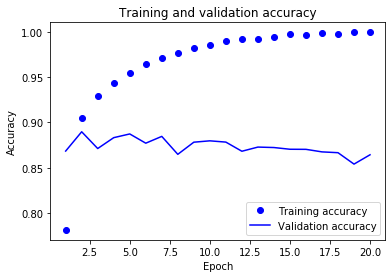

In [17]:
plt.plot(Epoch, acc, 'bo', label = 'Training accuracy')
plt.plot(Epoch, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

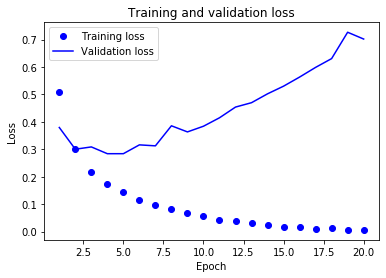

In [18]:
plt.plot(Epoch, loss, 'bo', label = 'Training loss')
plt.plot(Epoch, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6. Choose epoch and implement model on test set

In [19]:
Model = models.Sequential()
Model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
Model.add(layers.Dense(16, activation='relu'))
Model.add(layers.Dense(1, activation='sigmoid'))
Model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
Model.fit(X_train, Y_train, epochs=5, batch_size=512)

Epoch 1/5
25000/25000 [==============================] - 11s 445us/step - loss: 0.4751 - acc: 0.8218
Epoch 2/5
25000/25000 [==============================] - 5s 209us/step - loss: 0.2656 - acc: 0.9096
Epoch 3/5
25000/25000 [==============================] - 4s 157us/step - loss: 0.1983 - acc: 0.9298
Epoch 4/5
25000/25000 [==============================] - 4s 155us/step - loss: 0.1677 - acc: 0.9404
Epoch 5/5
25000/25000 [==============================] - 4s 161us/step - loss: 0.1431 - acc: 0.9502


In [20]:
results = Model.evaluate(X_test, Y_test)
print(results)

25000/25000 [==============================] - 122s 5ms/step
[0.31659901606559754, 0.8798]


In [21]:
Probs = Model.predict(X_test)

In [22]:
Probs[:5]

array([[0.20097157],
       [0.99992824],
       [0.7447963 ],
       [0.9060969 ],
       [0.97042847]], dtype=float32)

In [23]:
Y_test[:5]

array([0., 1., 1., 0., 1.])

In [24]:
Probs = np.squeeze(Probs, axis = 1)
print(Probs[:5])

[0.20097157 0.99992824 0.7447963  0.9060969  0.97042847]


In [25]:
print(Y_test[:5])

[0. 1. 1. 0. 1.]


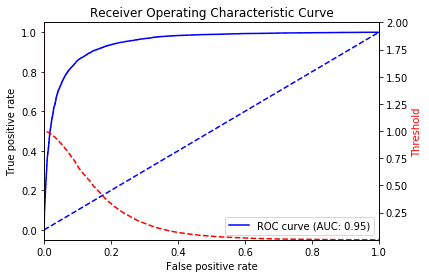

In [26]:
fpr, tpr, thresholds = roc_curve(Y_test, Probs, pos_label = 1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'ROC curve (AUC: %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc = 'lower right')

ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor = 'red', linestyle = 'dashed', color = 'r')
ax2.set_ylabel('Threshold', color = 'r')
ax2.set_ylim([thresholds[-1], thresholds[0]])
ax2.set_xlim([fpr[0], fpr[-1]])
plt.show()